## Import Libraries

In [11]:
!pip install ydata-profiling
!pip install sweetviz


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.0/390.0 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 78.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=5be8016b4420ed91d24af10bdff7f4edb1b9ac09b3afc080cb7028fd7c1a7017
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 80.5 MB/s eta 0:00:00


In [16]:
from ydata_profiling import ProfileReport
import sweetviz as sv
import plotly.express as px
#from google.colab import files

In [17]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

%matplotlib inline

## Load the Data

In [18]:
FootBallPlayers = pd.read_csv("final_data.csv")

In [19]:
FootBallPlayers.shape

(10754, 22)

In [20]:
FootBallPlayers.head(2)

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0


## Preprocess the Data

#### 1. Simple EDA + Data Quality checking

In [21]:
FootBallPlayers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

In [22]:
FootBallPlayers.describe()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
count,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04,10754.000000,10754.000000
mean,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,0.004666,0.006826,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06,2.713223,0.307513
std,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,0.025232,0.081143,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07,0.986356,0.461485
min,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,0.000000,0.000000,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,2.000000,0.000000
50%,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,0.000000,0.000000,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,3.000000,0.000000
75%,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,0.000000,0.000000,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,4.000000,1.000000
max,206.000000,43.000000,107.000000,11.250000,4.000000,30.000000,1.000000,6.923077,9.000000,90.000000,9510.000000,2349.000000,339.000000,92.000000,1.800000e+08,2.000000e+08,4.000000,1.000000


In [23]:
FootBallPlayers.describe(exclude='number')

,player,team,name,position
count,10754,10754,10754,10754
unique,10754,374,10584,16
top,/david-de-gea/profil/spieler/59377,Daejeon Hana Citizen,Paulinho,Defender Centre-Back
freq,1,46,6,1821


In [31]:
profile_FootBallPlayers = ProfileReport(FootBallPlayers, title="Profiling Report")
profile_FootBallPlayers.to_file("FootBallPlayers_report.html")
from google.colab import files
files.download('FootBallPlayers_report.html')
profile_FootBallPlayers

Output hidden; open in https://colab.research.google.com to view.

In [25]:
vis_report_FootBallPlayers = sv.analyze(FootBallPlayers)
vis_report_FootBallPlayers.show_html("vis_report_FootBallPlayers.html") # Default arguments will generate to "SWEETVIZ_REPORT.html"
from google.colab import files
files.download('vis_report_FootBallPlayers.html')
vis_report_FootBallPlayers.show_notebook()

Output hidden; open in https://colab.research.google.com to view.

In [32]:
# uniqeness
FootBallPlayers[FootBallPlayers.duplicated()]

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger


In [33]:
# uniqeness
FootBallPlayers.drop_duplicates(inplace=True)
FootBallPlayers[FootBallPlayers.duplicated()]

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger


In [34]:
# Completeness
FootBallPlayers.isnull().sum()

,0
player,0
team,0
name,0
position,0
height,0
age,0
appearance,0
goals,0
assists,0
yellow cards,0


In [35]:
# Accurecy types
FootBallPlayers.dtypes

,0
player,object
team,object
name,object
position,object
height,float64
age,float64
appearance,int64
goals,float64
assists,float64
yellow cards,float64


In [36]:
# Accurecy - Outlier

# Convert categorical variables using OneHotEncoding
categorical_features = ['player', 'team', 'name', 'position']
numeric_features = ['height', 'age', 'appearance', 'goals','assists','yellow cards','second yellow cards','red cards','goals conceded','clean sheets','minutes played','days_injured','games_injured','award','current_value','highest_value','position_encoded','winger']

In [37]:
FootBallPlayers[FootBallPlayers['current_value']>=120000000]

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
453,/erling-haaland/profil/spieler/418560,Manchester City,Erling Haaland,Attack Centre-Forward,195.0,22.0,83,1.118270,0.234699,0.124252,...,0.0,0.0,6519,204,36,17,170000000,170000000,4,0
960,/jude-bellingham/profil/spieler/581678,Borussia Dortmund,Jude Bellingham,midfield-CentralMidfield,186.0,19.0,86,0.244798,0.257038,0.269278,...,0.0,0.0,7353,19,4,2,120000000,120000000,3,0
1521,/vinicius-junior/profil/spieler/371998,Real Madrid,Vinicius Junior,Attack-LeftWinger,176.0,22.0,107,0.448356,0.408502,0.229160,...,0.0,0.0,9033,70,12,12,150000000,150000000,4,1
2644,/kylian-mbappe/profil/spieler/342229,Paris Saint-Germain,Kylian Mbappé,Attack Centre-Forward,178.0,24.0,89,0.963082,0.433387,0.204655,...,0.0,0.0,7476,139,23,37,180000000,200000000,4,0


In [38]:
FootBallPlayers[FootBallPlayers['current_value']<=0]

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
29,/mason-greenwood/profil/spieler/532826,Manchester United,Mason Greenwood,Attack-RightWinger,181.000000,21.000000,24,0.317647,0.105882,0.105882,...,0.0,0.0,1700,135,12,0,0,50000000,4,1
406,/sven-botman/profil/spieler/361093,Newcastle United,Sven Botman,Defender Centre-Back,195.000000,23.000000,76,0.041159,0.013720,0.123476,...,0.0,0.0,6560,118,19,4,0,0,2,0
407,/fabian-schar/profil/spieler/135343,Newcastle United,Fabian Schär,Defender Centre-Back,186.000000,31.000000,67,0.045678,0.076129,0.182710,...,0.0,0.0,5911,285,30,3,0,0,2,0
408,/jamaal-lascelles/profil/spieler/183318,Newcastle United,Jamaal Lascelles,Defender Centre-Back,188.000000,29.000000,38,0.068992,0.000000,0.310464,...,0.0,0.0,2609,418,57,2,0,0,2,0
409,/matt-targett/profil/spieler/250478,Newcastle United,Matt Targett,Defender Left-Back,183.000000,27.000000,54,0.023747,0.023747,0.094987,...,0.0,0.0,3790,380,66,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10581,/zahi-addis/profil/spieler/1069563,Brisbane Roar,Zahi Addis,Defender Left-Back,181.240353,19.000000,0,0.000000,0.000000,0.000000,...,0.0,0.0,0,0,0,0,0,0,2,1
10586,/james-murphy/profil/spieler/1069560,Brisbane Roar,James Murphy,midfield,181.240353,17.000000,0,0.000000,0.000000,0.000000,...,0.0,0.0,0,0,0,0,0,0,3,0
10587,/riley-gill/profil/spieler/1069561,Brisbane Roar,Riley Gill,midfield,181.240353,26.041903,0,0.000000,0.000000,0.000000,...,0.0,0.0,0,0,0,0,0,0,3,0
10686,/corey-hollman/profil/spieler/890186,Sydney FC,Corey Hollman,midfield-DefensiveMidfield,181.240353,19.000000,1,0.000000,0.000000,0.000000,...,0.0,0.0,3,0,0,0,0,0,3,0


In [39]:
FootBallPlayers[FootBallPlayers['highest_value']<=0]

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
406,/sven-botman/profil/spieler/361093,Newcastle United,Sven Botman,Defender Centre-Back,195.000000,23.000000,76,0.041159,0.013720,0.123476,...,0.0,0.0,6560,118,19,4,0,0,2,0
407,/fabian-schar/profil/spieler/135343,Newcastle United,Fabian Schär,Defender Centre-Back,186.000000,31.000000,67,0.045678,0.076129,0.182710,...,0.0,0.0,5911,285,30,3,0,0,2,0
408,/jamaal-lascelles/profil/spieler/183318,Newcastle United,Jamaal Lascelles,Defender Centre-Back,188.000000,29.000000,38,0.068992,0.000000,0.310464,...,0.0,0.0,2609,418,57,2,0,0,2,0
409,/matt-targett/profil/spieler/250478,Newcastle United,Matt Targett,Defender Left-Back,183.000000,27.000000,54,0.023747,0.023747,0.094987,...,0.0,0.0,3790,380,66,0,0,0,2,1
666,/mert-komur/profil/spieler/777005,FC Augsburg,Mert Kömür,midfield-AttackingMidfield,183.000000,17.000000,46,0.268876,0.293319,0.073330,...,0.0,0.0,3682,0,0,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10581,/zahi-addis/profil/spieler/1069563,Brisbane Roar,Zahi Addis,Defender Left-Back,181.240353,19.000000,0,0.000000,0.000000,0.000000,...,0.0,0.0,0,0,0,0,0,0,2,1
10586,/james-murphy/profil/spieler/1069560,Brisbane Roar,James Murphy,midfield,181.240353,17.000000,0,0.000000,0.000000,0.000000,...,0.0,0.0,0,0,0,0,0,0,3,0
10587,/riley-gill/profil/spieler/1069561,Brisbane Roar,Riley Gill,midfield,181.240353,26.041903,0,0.000000,0.000000,0.000000,...,0.0,0.0,0,0,0,0,0,0,3,0
10686,/corey-hollman/profil/spieler/890186,Sydney FC,Corey Hollman,midfield-DefensiveMidfield,181.240353,19.000000,1,0.000000,0.000000,0.000000,...,0.0,0.0,3,0,0,0,0,0,3,0


In [41]:
FootBallPlayers[FootBallPlayers['assists']>=2]

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
3271,/gabriel-carabajal/profil/spieler/280157,Clube de Regatas Vasco da Gama,Gabriel Carabajal,midfield-AttackingMidfield,178.0,32.0,2,0.0,2.045455,0.0,...,0.0,0.0,44,0,0,0,600000,2000000,3,0
6180,/denis-kovacevic/profil/spieler/672248,Istanbulspor,Denis Kovacevic,Defender Left-Back,181.0,20.0,1,0.0,3.461538,0.0,...,0.0,0.0,26,2,1,0,50000,100000,2,1
6869,/kristian-fletcher/profil/spieler/967000,D.C. United,Kristian Fletcher,Attack-LeftWinger,183.0,17.0,6,0.0,2.903226,0.0,...,0.0,0.0,31,0,0,0,1000000,1000000,4,1
8387,/riki-harakawa/profil/spieler/212115,Cerezo Osaka,Riki Harakawa,midfield-CentralMidfield,175.0,29.0,1,0.0,4.000000,0.0,...,0.0,0.0,90,268,27,0,700000,775000,3,0
9091,/fares-ayed-al-sharani/profil/spieler/901311,Damac FC,Fares Ayed Al-Sharani,Attack Centre-Forward,172.0,22.0,4,0.0,2.647059,0.0,...,0.0,0.0,34,0,0,0,25000,25000,4,0
9464,/ki-hun-yeom/profil/spieler/92093,Suwon Samsung Bluewings,Ki-hun Yeom,Attack-LeftWinger,182.0,40.0,1,0.0,2.000000,0.0,...,0.0,0.0,90,67,6,6,150000,1500000,4,1


In [58]:
# Calculate the frequency of each
type_counts = FootBallPlayers[['highest_value','appearance','minutes played','award', 'assists', 'goals', 'position_encoded']].value_counts()
type_counts.sort_values(ascending=False)

highest_value  appearance  minutes played  award  assists   goals     position_encoded
25000          0           0               0      0.000000  0.000000  1                   21
                                                                      3                   19
50000          0           0               0      0.000000  0.000000  1                   17
100000         0           0               0      0.000000  0.000000  1                   17
50000          0           0               0      0.000000  0.000000  3                   17
                                                                                          ..
55000000       51          3015            11     0.059701  0.537313  4                    1
60000000       25          1334            14     0.000000  0.067466  4                    1
               48          2604            33     0.103687  0.311060  4                    1
50000000       64          3750            10     0.144000  0.600000  4                    1
150000000      89          6142            16     0.161185  0.512862  4                    1
Name: count, Length: 5165, dtype: int64

In [59]:
# Calculate the frequency of each 'highest_value'
type_counts = FootBallPlayers['highest_value'].value_counts()


# Filter 'highest_value' values that appear 10 or more times
FootBallPlayers=FootBallPlayers[FootBallPlayers['highest_value'].isin(type_counts[type_counts >= 2].index)]


In [61]:
# Calculate the frequency of each 'appearance'
type_counts = FootBallPlayers['appearance'].value_counts()


# Filter 'appearance' values that appear 10 or more times
FootBallPlayers=FootBallPlayers[FootBallPlayers['appearance'].isin(type_counts[type_counts >= 2].index)]


In [62]:
# Calculate the frequency of each 'minutes played'
type_counts = FootBallPlayers['minutes played'].value_counts()


# Filter 'appearance' values that appear 10 or more times
FootBallPlayers=FootBallPlayers[FootBallPlayers['minutes played'].isin(type_counts[type_counts >= 2].index)]


In [63]:
# Calculate the frequency of each 'award'
type_counts = FootBallPlayers['award'].value_counts()


# Filter 'award' values that appear 10 or more times
FootBallPlayers=FootBallPlayers[FootBallPlayers['award'].isin(type_counts[type_counts >= 2].index)]


In [64]:
# Calculate the frequency of each 'assists'
type_counts = FootBallPlayers['assists'].value_counts()


# Filter 'assists' values that appear 10 or more times
FootBallPlayers=FootBallPlayers[FootBallPlayers['assists'].isin(type_counts[type_counts >= 2].index)]


In [65]:
# Calculate the frequency of each 'assists'
type_counts = FootBallPlayers['goals'].value_counts()


# Filter 'goals' values that appear 10 or more times
FootBallPlayers=FootBallPlayers[FootBallPlayers['goals'].isin(type_counts[type_counts >= 2].index)]


In [66]:
# Calculate the frequency of each 'position_encoded'
type_counts = FootBallPlayers['position_encoded'].value_counts()


# Filter 'position_encoded' values that appear 10 or more times
FootBallPlayers=FootBallPlayers[FootBallPlayers['position_encoded'].isin(type_counts[type_counts >= 2].index)]


In [67]:
FootBallPlayers.shape

(3631, 22)

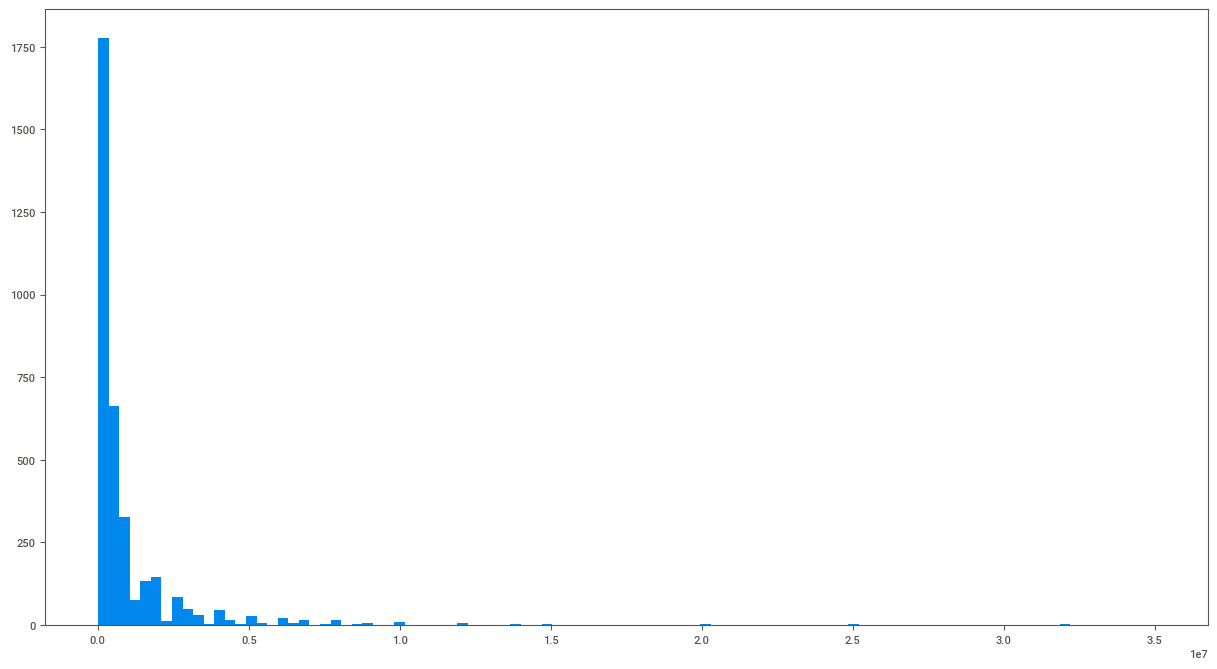

In [68]:
plt.figure(figsize=(15,8))
plt.hist(FootBallPlayers[(FootBallPlayers['current_value']<=180000000) & (FootBallPlayers['current_value']>0)]['current_value'], bins=100);


In [69]:

FootBallPlayers=FootBallPlayers[(FootBallPlayers['current_value']<=180000000) & (FootBallPlayers['current_value']>0)]

In [70]:
FootBallPlayers.shape

(3503, 22)

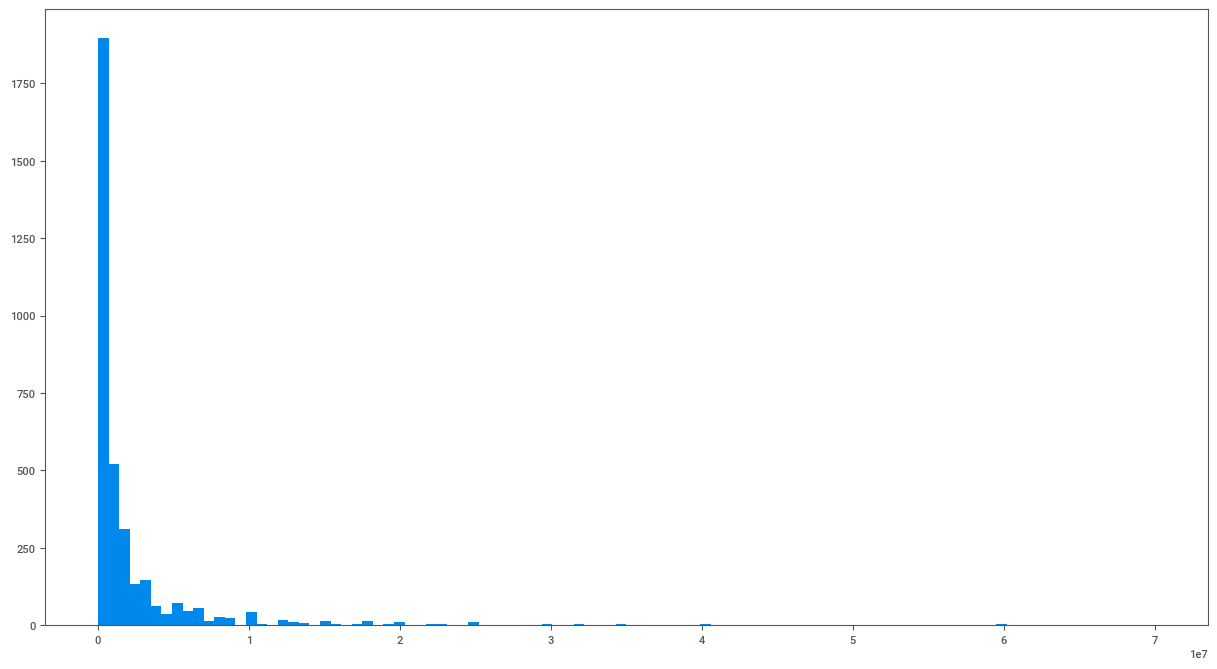

In [71]:
plt.figure(figsize=(15,8))
plt.hist(FootBallPlayers[(FootBallPlayers['highest_value']<=200000000) & (FootBallPlayers['highest_value']>0)]['highest_value'], bins=100);


In [73]:

FootBallPlayers=FootBallPlayers[(FootBallPlayers['highest_value']<=200000000) & (FootBallPlayers['highest_value']>0)]

In [74]:
FootBallPlayers.shape

(3503, 22)

#### 2. Feature engineering

1. Feature scaling
2. Aggregation
3. One hot coding

In [75]:
FootBallPlayers.head(2)

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.0,0.0,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0


In [76]:
categorical_features

['player', 'team', 'name', 'position']

In [78]:
# one hot coding
FootBallPlayers = pd.get_dummies(FootBallPlayers, columns=categorical_features)

In [79]:
FootBallPlayers.shape

(3503, 7379)

In [80]:
FootBallPlayers.head(2)

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,...,position_Defender Centre-Back,position_Defender Left-Back,position_Defender Right-Back,position_Goalkeeper,position_midfield,position_midfield-AttackingMidfield,position_midfield-CentralMidfield,position_midfield-DefensiveMidfield,position_midfield-LeftMidfield,position_midfield-RightMidfield
1,196.0,30.0,15,0.0,0.0,0.069018,0.0,0.0,1.242331,0.207055,...,False,False,False,True,False,False,False,False,False,False
2,188.0,37.0,4,0.0,0.0,0.000000,0.0,0.0,0.616438,0.924658,...,False,False,False,True,False,False,False,False,False,False


#### 3. Feature selection

In [ ]:
# sns.heatmap(df.corr(), annot=True);

In [81]:
correlation = FootBallPlayers.corr()


KeyError: 'current_value\t'

In [82]:
print(correlation['current_value'].sort_values(ascending=False))

current_value                1.000000
highest_value                0.699673
appearance                   0.303642
minutes played               0.289386
name_Gregor Kobel            0.257902
                               ...   
team_Al-Batin FC            -0.032554
team_Daejeon Hana Citizen   -0.034109
position_Attack             -0.040341
position_Goalkeeper         -0.040692
position_midfield           -0.051039
Name: current_value, Length: 7379, dtype: float64


In [96]:
# Set the correlation threshold
threshold = 0.1  # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['current_value']) > threshold]['current_value'].index
selected_features.to_list()

['appearance',
 'minutes played',
 'days_injured',
 'games_injured',
 'award',
 'current_value',
 'highest_value',
 'player_/andre-onana/profil/spieler/234509',
 'player_/andrey-santos/profil/spieler/743600',
 'player_/arthur-melo/profil/spieler/362842',
 'player_/davinson-sanchez/profil/spieler/341429',
 'player_/donny-van-de-beek/profil/spieler/288255',
 'player_/endrick/profil/spieler/971570',
 'player_/giorgian-de-arrascaeta/profil/spieler/248410',
 'player_/gregor-kobel/profil/spieler/257814',
 'player_/joao-gomes/profil/spieler/735570',
 'player_/joao-pedro/profil/spieler/626724',
 'player_/joe-gomez/profil/spieler/256178',
 'player_/jordan-pickford/profil/spieler/130164',
 'player_/kepa-arrizabalaga/profil/spieler/192279',
 'player_/matvey-safonov/profil/spieler/318470',
 'player_/pedro-neto/profil/spieler/487465',
 'player_/robert-sanchez/profil/spieler/403151',
 'player_/robin-koch/profil/spieler/328784',
 'player_/strahinja-pavlovic/profil/spieler/574671',
 'team_Borussia Dor

In [95]:
selected_features.size, type(selected_features)

(50, pandas.core.indexes.base.Index)

In [ ]:
pl

In [97]:
FootBallPlayers = FootBallPlayers[selected_features]
FootBallPlayers.head()

,appearance,minutes played,days_injured,games_injured,award,current_value,highest_value,player_/andre-onana/profil/spieler/234509,player_/andrey-santos/profil/spieler/743600,player_/arthur-melo/profil/spieler/362842,...,name_Joe Gomez,name_Jordan Pickford,name_João Gomes,name_João Pedro,name_Kepa Arrizabalaga,name_Matvey Safonov,name_Pedro Neto,name_Robert Sánchez,name_Robin Koch,name_Strahinja Pavlovic
1,15,1304,510,58,1,1500000,22000000,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,4,292,697,84,4,600000,6000000,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,8,416,932,169,7,2000000,20000000,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11,34,2686,175,28,1,10000000,12000000,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19,31,1157,378,65,6,17000000,55000000,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### 4. Prepare train and test data

In [98]:
# Prepare data
X = FootBallPlayers.drop(['current_value'], axis=1)
y = FootBallPlayers['current_value']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [99]:
X.shape

(3503, 49)

## Buliding the Model

In [104]:
model = LinearRegression()

In [105]:
ridge_model = Ridge()  # You can adjust alpha to see different results

In [106]:
lasso_model = Lasso()  # You can adjust alpha to see different results

In [107]:
param_grid = {
    'alpha': [0, 0.0000003, 0.0002, 0.001, 0.01, 0.5, 1, 5]  # Regularization strength
}
grid_search = GridSearchCV(estimator=ridge_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           verbose=1)

grid_search_lasso = GridSearchCV(estimator=lasso_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           verbose=1)

## Train the Model

In [108]:
# Fit the model on the training data
model.fit(X_train_scaled, y_train)

LinearRegression()

## Test the Model

In [109]:
# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)

## Interpretation of the Model

In [110]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
appearance,2.601022e+04
minutes played,1.623219e+05
days_injured,1.472320e+05
games_injured,-3.165980e+05
award,-1.522464e+05
highest_value,1.383650e+06
player_/andre-onana/profil/spieler/234509,-4.002063e+17
player_/andrey-santos/profil/spieler/743600,2.037167e+16
player_/arthur-melo/profil/spieler/362842,-2.237337e+17
player_/davinson-sanchez/profil/spieler/341429,-1.030458e+19


In [111]:
print(model.intercept_)

999377.2305496074


In [113]:
# Fit the Lasso model to the data
lasso_model.fit(X_train_scaled, y_train)  # Assuming X_train_scaled and y_train are your training data

# Now you can access the coef_ attribute
coeff_df = pd.DataFrame(lasso_model.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
appearance,2.546812e+04
minutes played,1.624680e+05
days_injured,1.502757e+05
games_injured,-3.202824e+05
award,-1.540188e+05
highest_value,1.389524e+06
player_/andre-onana/profil/spieler/234509,0.000000e+00
player_/andrey-santos/profil/spieler/743600,1.888849e+05
player_/arthur-melo/profil/spieler/362842,-1.226976e+05
player_/davinson-sanchez/profil/spieler/341429,1.112256e+04


## Evaluating the Model

1. Mean Square Error

In [114]:
y_base = [y_train.mean()] * len(y_test)

In [115]:
# our benchmark model
mse_base = mean_squared_error(y_test, y_base )
print(f'Mean Squared Error of base model: {mse_base}')

Mean Squared Error of base model: 4594839775033.126


In [116]:
mse_train = mean_squared_error(y_train, model.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for training: {mse_train}')
print(f'Mean Squared Error for testing: {mse_test}')

Mean Squared Error for training: 1202749018207.847
Mean Squared Error for testing: 2.839876429148021e+32


2. Mean Absolute Error

In [117]:
# our benchmark model
mse_base = mean_absolute_error(y_test, y_base )
print(f'Mean Absolute  Error of base model: {mse_base}')

Mean Absolute  Error of base model: 1099449.0612472647


In [118]:
mae_train = mean_absolute_error(y_train, model.predict(X_train_scaled))
mae_test = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error for training: {mae_train}')
print(f'Mean Absolute Error for testing: {mae_test}')

Mean Absolute Error for training: 607016.7111765278
Mean Absolute Error for testing: 1018867682376916.1


3. Root Mean Squared Error

In [119]:
# our benchmark model
print(f'Root Mean Squared  Error of base model: {np.sqrt(mse_base)}')

Root Mean Squared  Error of base model: 1048.5461655298086


In [120]:
print(f'Root Mean Squared Error for training: {np.sqrt(mse_train)}')
print(f'Root Mean Squared Error for testing: {np.sqrt(mse_test)}')

Root Mean Squared Error for training: 1096699.1466249288
Root Mean Squared Error for testing: 1.6851932913313004e+16


4. R Square

In [121]:
r2_score_train = r2_score(y_train, model.predict(X_train_scaled))
r2_score_test = r2_score(y_test, y_pred)
print(f'R Square for training: {r2_score_train}')
print(f'R Square for testing: {r2_score_test}')

R Square for training: 0.7618474851006095
R Square for testing: -6.1870329736911995e+19


#### Predictions vs. Real Values

In [122]:
predictions = model.predict(X_test_scaled)
#predictions

In [123]:
Real_Values = np.array(y_test)
#Real_Values

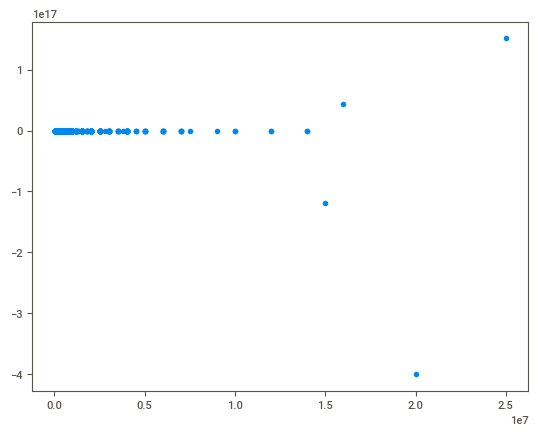

In [124]:
plt.scatter(Real_Values,predictions);

#### Residual Histogram

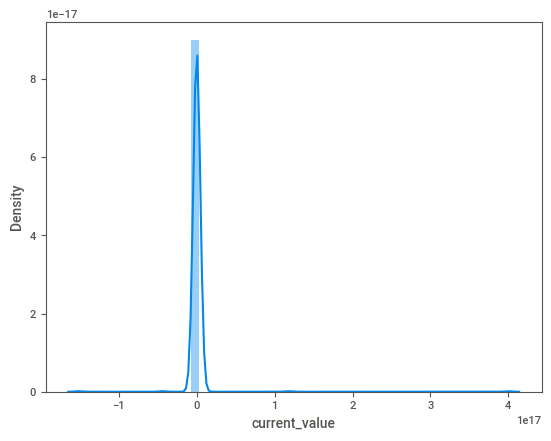

In [125]:
sns.distplot((y_test-predictions),bins=50); # it's good if we get normal distribution